<h1><center><center><h1><h1><center><span style="color:#26c2c2">Neural Net Building</span><center><h1>

# Importing Files I need :

In [1]:
import Pipelines
import Mytest

# Libraries :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras import backend as K
from keras import layers, metrics
from tensorflow.keras import regularizers
from sklearn.model_selection import KFold
from tensorflow.keras.layers import BatchNormalization, Add
from tensorflow.keras.models import Model

# Remove Warning :

In [3]:
import warnings
warnings.simplefilter("ignore")

# Datasets :

In [4]:
X_train = pd.read_csv('Datasets/xtrain_data.csv')
y_train = pd.read_csv('Datasets/ytrain_data.csv')
X_test = pd.read_csv('Datasets/xtest_data.csv')
y_test = pd.read_csv('Datasets/ytest_data.csv')

ds = Mytest.DataChecker(X_train, y_train, X_test, y_test)
ds.check_shapes()
ds.check_negative_values_y()

### Making all data processing steps on the `X_train`,`y_train`,`X_test` and `y_test` data

In [5]:
from Pipelines import FullPipeline5

full_pipeline = FullPipeline5()
X_train, y_train = full_pipeline.fit_transform(X_train, y_train)
X_test, y_test = full_pipeline.transform(X_test, y_test)

ds = Mytest.DataChecker(X_train, y_train, X_test, y_test)
ds.check_shapes()
ds.check_negative_values_y()
ds.check_nan_values_X()

### The Pipeline :

In [6]:
from sklearn import set_config
set_config(display='diagram')
full_pipeline.full_pipeline

Pipeline(steps=[('selector', ColumnSelector()),
                ('add_cols',
                 AddColumnsTransformer(col1='Hepatitis B', col2='Polio',
                                       new_col_name='vaccinations')),
                ('imputer',
                 DataFrameImputer(freq_cols=['Status', 'Country'],
                                  knn_cols=['Population'],
                                  median_cols=['Year', 'Adult Mortality',
                                               'infant deaths', 'Alcohol',
                                               'percentage expenditure',
                                               'Hepatitis B', 'Measles ',
                                               ' BMI ', 'under-five...
                 LogTransform(col='under-five deaths ', domain_shift=0.1)),
                ('label_encode', LabelEncodeColumns(cols=['Status'])),
                ('binary_encode', BinaryEncodeColumns(cols=['Country'])),
                ('scale',
                 StandardScaleTransform(cols=['Status', 'Adult Mortality',
                                              'Alcohol', 'Measles ', ' BMI ',
                                              'under-five deaths ',
                                              'Total expenditure', ' HIV/AIDS',
                                              'GDP', 'Population',
                                              ' thinness  1-19 years',
                                              'Income composition of resources',
                                              'vaccinations', 'Year']))])

## I have a python script named as `NeuralNets.py` contains different architectures I need

In [7]:
from NeuralNets import ForwardfeedNN, ResNet

<br><br><br><br><br><br><br><br><br><br>

<h1><Font color='#26c2c2' size=30>Feedforward Neural Network:</Font></h1>

In [8]:
model = ForwardfeedNN()

model.fit(X_train,y_train,epochs=800,batch_size=256*2)
y_pred = model.predict(X_test)

Epoch 1/800
4/4 [==============================] - 7s 209ms/step - loss: 69.1868 - mae: 69.1868 - val_loss: 68.9540 - val_mae: 68.9540
Epoch 2/800
4/4 [==============================] - 0s 28ms/step - loss: 69.1592 - mae: 69.1592 - val_loss: 68.9373 - val_mae: 68.9373
Epoch 3/800
4/4 [==============================] - 0s 39ms/step - loss: 69.1307 - mae: 69.1307 - val_loss: 68.9187 - val_mae: 68.9187
Epoch 4/800
4/4 [==============================] - 0s 34ms/step - loss: 69.1009 - mae: 69.1009 - val_loss: 68.8994 - val_mae: 68.8994
Epoch 5/800
4/4 [==============================] - 0s 28ms/step - loss: 69.0698 - mae: 69.0698 - val_loss: 68.8784 - val_mae: 68.8784
Epoch 6/800
4/4 [==============================] - 0s 27ms/step - loss: 69.0373 - mae: 69.0373 - val_loss: 68.8537 - val_mae: 68.8537
Epoch 7/800
4/4 [==============================] - 0s 70ms/step - loss: 69.0032 - mae: 69.0032 - val_loss: 68.8282 - val_mae: 68.8282
Epoch 8/800
4/4 [==============================] - 0s 26ms/st

Epoch 62/800
4/4 [==============================] - 0s 48ms/step - loss: 63.4782 - mae: 63.4782 - val_loss: 62.0767 - val_mae: 62.0767
Epoch 63/800
4/4 [==============================] - 0s 32ms/step - loss: 63.3044 - mae: 63.3044 - val_loss: 61.8063 - val_mae: 61.8063
Epoch 64/800
4/4 [==============================] - 0s 26ms/step - loss: 63.1280 - mae: 63.1280 - val_loss: 61.5209 - val_mae: 61.5209
Epoch 65/800
4/4 [==============================] - 0s 29ms/step - loss: 62.9489 - mae: 62.9489 - val_loss: 61.2625 - val_mae: 61.2625
Epoch 66/800
4/4 [==============================] - 0s 43ms/step - loss: 62.7671 - mae: 62.7671 - val_loss: 60.9784 - val_mae: 60.9784
Epoch 67/800
4/4 [==============================] - 0s 35ms/step - loss: 62.5827 - mae: 62.5827 - val_loss: 60.7199 - val_mae: 60.7199
Epoch 68/800
4/4 [==============================] - 0s 29ms/step - loss: 62.3956 - mae: 62.3956 - val_loss: 60.4507 - val_mae: 60.4507
Epoch 69/800
4/4 [==============================] - 0s 

4/4 [==============================] - 0s 35ms/step - loss: 48.3969 - mae: 48.3969 - val_loss: 45.3103 - val_mae: 45.3103
Epoch 123/800
4/4 [==============================] - 0s 27ms/step - loss: 48.0671 - mae: 48.0671 - val_loss: 42.4265 - val_mae: 42.4265
Epoch 124/800
4/4 [==============================] - 0s 27ms/step - loss: 47.7347 - mae: 47.7347 - val_loss: 40.1285 - val_mae: 40.1285
Epoch 125/800
4/4 [==============================] - 0s 59ms/step - loss: 47.3998 - mae: 47.3998 - val_loss: 39.4846 - val_mae: 39.4846
Epoch 126/800
4/4 [==============================] - 0s 30ms/step - loss: 47.0624 - mae: 47.0624 - val_loss: 39.2625 - val_mae: 39.2625
Epoch 127/800
4/4 [==============================] - 0s 28ms/step - loss: 46.7225 - mae: 46.7225 - val_loss: 39.2698 - val_mae: 39.2698
Epoch 128/800
4/4 [==============================] - 0s 43ms/step - loss: 46.3801 - mae: 46.3801 - val_loss: 39.5046 - val_mae: 39.5046
Epoch 129/800
4/4 [==============================] - 0s 36ms/s

4/4 [==============================] - 0s 37ms/step - loss: 24.2783 - mae: 24.2783 - val_loss: 22.9206 - val_mae: 22.9206
Epoch 183/800
4/4 [==============================] - 0s 35ms/step - loss: 23.8083 - mae: 23.8083 - val_loss: 20.3953 - val_mae: 20.3953
Epoch 184/800
4/4 [==============================] - 0s 28ms/step - loss: 23.3257 - mae: 23.3257 - val_loss: 17.6941 - val_mae: 17.6941
Epoch 185/800
4/4 [==============================] - 0s 26ms/step - loss: 22.8491 - mae: 22.8491 - val_loss: 18.2806 - val_mae: 18.2806
Epoch 186/800
4/4 [==============================] - 0s 71ms/step - loss: 22.3657 - mae: 22.3657 - val_loss: 19.7870 - val_mae: 19.7870
Epoch 187/800
4/4 [==============================] - 0s 28ms/step - loss: 21.8874 - mae: 21.8874 - val_loss: 22.9378 - val_mae: 22.9378
Epoch 188/800
4/4 [==============================] - 0s 31ms/step - loss: 21.3969 - mae: 21.3969 - val_loss: 27.1956 - val_mae: 27.1956
Epoch 189/800
4/4 [==============================] - 0s 44ms/s

Epoch 243/800
4/4 [==============================] - 0s 35ms/step - loss: 1.6523 - mae: 1.6523 - val_loss: 8.4715 - val_mae: 8.4715
Epoch 244/800
4/4 [==============================] - 0s 27ms/step - loss: 1.6895 - mae: 1.6895 - val_loss: 8.4936 - val_mae: 8.4936
Epoch 245/800
4/4 [==============================] - 0s 29ms/step - loss: 1.5618 - mae: 1.5618 - val_loss: 8.6558 - val_mae: 8.6558
Epoch 246/800
4/4 [==============================] - 0s 38ms/step - loss: 1.5965 - mae: 1.5965 - val_loss: 7.1701 - val_mae: 7.1701
Epoch 247/800
4/4 [==============================] - 0s 36ms/step - loss: 1.6121 - mae: 1.6121 - val_loss: 7.5929 - val_mae: 7.5929
Epoch 248/800
4/4 [==============================] - 0s 29ms/step - loss: 1.5870 - mae: 1.5870 - val_loss: 7.0199 - val_mae: 7.0199
Epoch 249/800
4/4 [==============================] - 0s 29ms/step - loss: 1.7179 - mae: 1.7179 - val_loss: 5.6522 - val_mae: 5.6522
Epoch 250/800
4/4 [==============================] - 0s 64ms/step - loss: 1.

4/4 [==============================] - 0s 27ms/step - loss: 1.1328 - mae: 1.1328 - val_loss: 1.3900 - val_mae: 1.3900
Epoch 306/800
4/4 [==============================] - 0s 26ms/step - loss: 1.1505 - mae: 1.1505 - val_loss: 1.3677 - val_mae: 1.3677
Epoch 307/800
4/4 [==============================] - 0s 64ms/step - loss: 1.1671 - mae: 1.1671 - val_loss: 1.3811 - val_mae: 1.3811
Epoch 308/800
4/4 [==============================] - 0s 28ms/step - loss: 1.1814 - mae: 1.1814 - val_loss: 1.3716 - val_mae: 1.3716
Epoch 309/800
4/4 [==============================] - 0s 26ms/step - loss: 1.1310 - mae: 1.1310 - val_loss: 1.3813 - val_mae: 1.3813
Epoch 310/800
4/4 [==============================] - 0s 57ms/step - loss: 1.1852 - mae: 1.1852 - val_loss: 1.3930 - val_mae: 1.3930
Epoch 311/800
4/4 [==============================] - 0s 32ms/step - loss: 1.2766 - mae: 1.2766 - val_loss: 1.3328 - val_mae: 1.3328
Epoch 312/800
4/4 [==============================] - 0s 28ms/step - loss: 1.1295 - mae: 1.

4/4 [==============================] - 0s 26ms/step - loss: 1.0423 - mae: 1.0423 - val_loss: 1.1798 - val_mae: 1.1798
Epoch 368/800
4/4 [==============================] - 0s 76ms/step - loss: 1.0038 - mae: 1.0038 - val_loss: 1.1727 - val_mae: 1.1727
Epoch 369/800
4/4 [==============================] - 0s 27ms/step - loss: 1.0312 - mae: 1.0312 - val_loss: 1.1565 - val_mae: 1.1565
Epoch 370/800
4/4 [==============================] - 0s 71ms/step - loss: 1.0206 - mae: 1.0206 - val_loss: 1.1464 - val_mae: 1.1464
Epoch 371/800
4/4 [==============================] - 0s 30ms/step - loss: 1.0096 - mae: 1.0096 - val_loss: 1.1734 - val_mae: 1.1734
Epoch 372/800
4/4 [==============================] - 0s 28ms/step - loss: 1.1035 - mae: 1.1035 - val_loss: 1.1615 - val_mae: 1.1615
Epoch 373/800
4/4 [==============================] - 0s 40ms/step - loss: 1.0112 - mae: 1.0112 - val_loss: 1.1650 - val_mae: 1.1650
Epoch 374/800
4/4 [==============================] - 0s 46ms/step - loss: 1.0255 - mae: 1.

4/4 [==============================] - 0s 27ms/step - loss: 0.9639 - mae: 0.9639 - val_loss: 1.1901 - val_mae: 1.1901
Epoch 430/800
4/4 [==============================] - 0s 46ms/step - loss: 0.9564 - mae: 0.9564 - val_loss: 1.2315 - val_mae: 1.2315
Epoch 431/800
4/4 [==============================] - 0s 35ms/step - loss: 0.9585 - mae: 0.9585 - val_loss: 1.1801 - val_mae: 1.1801
Epoch 432/800
4/4 [==============================] - 0s 29ms/step - loss: 0.9437 - mae: 0.9437 - val_loss: 1.1144 - val_mae: 1.1144
Epoch 433/800
4/4 [==============================] - 0s 30ms/step - loss: 0.9079 - mae: 0.9079 - val_loss: 1.1410 - val_mae: 1.1410
Epoch 434/800
4/4 [==============================] - 0s 62ms/step - loss: 0.9188 - mae: 0.9188 - val_loss: 1.1588 - val_mae: 1.1588
Epoch 435/800
4/4 [==============================] - 0s 28ms/step - loss: 0.9521 - mae: 0.9521 - val_loss: 1.1207 - val_mae: 1.1207
Epoch 436/800
4/4 [==============================] - 0s 28ms/step - loss: 1.0282 - mae: 1.

4/4 [==============================] - 0s 30ms/step - loss: 1.0581 - mae: 1.0581 - val_loss: 1.0923 - val_mae: 1.0923
Epoch 492/800
4/4 [==============================] - 0s 29ms/step - loss: 0.8558 - mae: 0.8558 - val_loss: 1.0726 - val_mae: 1.0726
Epoch 493/800
4/4 [==============================] - 0s 51ms/step - loss: 0.9419 - mae: 0.9419 - val_loss: 1.0618 - val_mae: 1.0618
Epoch 494/800
4/4 [==============================] - 0s 33ms/step - loss: 0.8914 - mae: 0.8914 - val_loss: 1.0673 - val_mae: 1.0673
Epoch 495/800
4/4 [==============================] - 0s 27ms/step - loss: 0.8525 - mae: 0.8525 - val_loss: 1.0892 - val_mae: 1.0892
Epoch 496/800
4/4 [==============================] - 0s 30ms/step - loss: 0.8743 - mae: 0.8743 - val_loss: 1.0889 - val_mae: 1.0889
Epoch 497/800
4/4 [==============================] - 0s 58ms/step - loss: 0.8166 - mae: 0.8166 - val_loss: 1.0779 - val_mae: 1.0779
Epoch 498/800
4/4 [==============================] - 0s 27ms/step - loss: 0.9105 - mae: 0.

4/4 [==============================] - 0s 46ms/step - loss: 0.8801 - mae: 0.8801 - val_loss: 1.1455 - val_mae: 1.1455
Epoch 554/800
4/4 [==============================] - 0s 34ms/step - loss: 0.8097 - mae: 0.8097 - val_loss: 1.0661 - val_mae: 1.0661
Epoch 555/800
4/4 [==============================] - 0s 29ms/step - loss: 0.9501 - mae: 0.9501 - val_loss: 1.0523 - val_mae: 1.0523
Epoch 556/800
4/4 [==============================] - 0s 29ms/step - loss: 0.8491 - mae: 0.8491 - val_loss: 1.0677 - val_mae: 1.0677
Epoch 557/800
4/4 [==============================] - 0s 48ms/step - loss: 0.8418 - mae: 0.8418 - val_loss: 1.1124 - val_mae: 1.1124
Epoch 558/800
4/4 [==============================] - 0s 35ms/step - loss: 0.9478 - mae: 0.9478 - val_loss: 1.0803 - val_mae: 1.0803
Epoch 559/800
4/4 [==============================] - 0s 29ms/step - loss: 0.8209 - mae: 0.8209 - val_loss: 1.0729 - val_mae: 1.0729
Epoch 560/800
4/4 [==============================] - 0s 27ms/step - loss: 0.7988 - mae: 0.

4/4 [==============================] - 0s 41ms/step - loss: 0.7547 - mae: 0.7547 - val_loss: 1.0604 - val_mae: 1.0604
Epoch 616/800
4/4 [==============================] - 0s 37ms/step - loss: 0.9457 - mae: 0.9457 - val_loss: 1.0661 - val_mae: 1.0661
Epoch 617/800
4/4 [==============================] - 0s 30ms/step - loss: 0.8493 - mae: 0.8493 - val_loss: 1.0489 - val_mae: 1.0489
Epoch 618/800
4/4 [==============================] - 0s 34ms/step - loss: 0.8129 - mae: 0.8129 - val_loss: 1.0644 - val_mae: 1.0644
Epoch 619/800
4/4 [==============================] - 0s 40ms/step - loss: 0.7629 - mae: 0.7629 - val_loss: 1.0696 - val_mae: 1.0696
Epoch 620/800
4/4 [==============================] - 0s 38ms/step - loss: 0.7893 - mae: 0.7893 - val_loss: 1.0643 - val_mae: 1.0643
Epoch 621/800
4/4 [==============================] - 0s 31ms/step - loss: 0.8522 - mae: 0.8522 - val_loss: 1.0750 - val_mae: 1.0750
Epoch 622/800
4/4 [==============================] - 0s 29ms/step - loss: 0.7750 - mae: 0.

4/4 [==============================] - 0s 29ms/step - loss: 0.8473 - mae: 0.8473 - val_loss: 1.0949 - val_mae: 1.0949
Epoch 678/800
4/4 [==============================] - 0s 31ms/step - loss: 0.8208 - mae: 0.8208 - val_loss: 1.1030 - val_mae: 1.1030
Epoch 679/800
4/4 [==============================] - 0s 52ms/step - loss: 0.7568 - mae: 0.7568 - val_loss: 1.0920 - val_mae: 1.0920
Epoch 680/800
4/4 [==============================] - 0s 32ms/step - loss: 0.7732 - mae: 0.7732 - val_loss: 1.0775 - val_mae: 1.0775
Epoch 681/800
4/4 [==============================] - 0s 29ms/step - loss: 0.7404 - mae: 0.7404 - val_loss: 1.0798 - val_mae: 1.0798
Epoch 682/800
4/4 [==============================] - 0s 32ms/step - loss: 0.7723 - mae: 0.7723 - val_loss: 1.0792 - val_mae: 1.0792
Epoch 683/800
4/4 [==============================] - 0s 55ms/step - loss: 0.8203 - mae: 0.8203 - val_loss: 1.0417 - val_mae: 1.0417
Epoch 684/800
4/4 [==============================] - 0s 30ms/step - loss: 0.7991 - mae: 0.

4/4 [==============================] - 0s 27ms/step - loss: 0.7967 - mae: 0.7967 - val_loss: 1.0459 - val_mae: 1.0459
Epoch 740/800
4/4 [==============================] - 0s 65ms/step - loss: 0.7110 - mae: 0.7110 - val_loss: 1.0520 - val_mae: 1.0520
Epoch 741/800
4/4 [==============================] - 0s 29ms/step - loss: 0.9382 - mae: 0.9382 - val_loss: 1.0764 - val_mae: 1.0764
Epoch 742/800
4/4 [==============================] - 0s 27ms/step - loss: 0.6853 - mae: 0.6853 - val_loss: 1.0859 - val_mae: 1.0859
Epoch 743/800
4/4 [==============================] - 0s 58ms/step - loss: 0.7095 - mae: 0.7095 - val_loss: 1.1081 - val_mae: 1.1081
Epoch 744/800
4/4 [==============================] - 0s 31ms/step - loss: 0.7921 - mae: 0.7921 - val_loss: 1.0901 - val_mae: 1.0901
Epoch 745/800
4/4 [==============================] - 0s 29ms/step - loss: 0.7869 - mae: 0.7869 - val_loss: 1.0942 - val_mae: 1.0942
Epoch 746/800
4/4 [==============================] - 0s 33ms/step - loss: 0.8389 - mae: 0.

19/19 [==============================] - 0s 1ms/step


In [9]:
train_score = model.predict(X_train)
print("\nMAE on training set:", mean_absolute_error(y_train, train_score),'\n')

y_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("\nMAE on test set:", test_mae)

74/74 [==============================] - 0s 2ms/step

MAE on training set: 0.5432211692673238 

19/19 [==============================] - 0s 3ms/step

MAE on test set: 1.0440549127884695


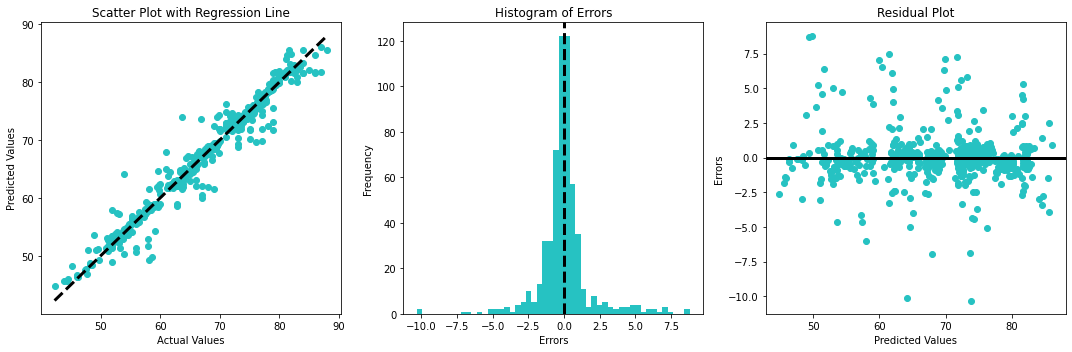

In [10]:
plot = Pipelines.RegressionPlot(y_test, y_pred.reshape(-1), color='#26c2c2')
plot.plot()

<br><br><br><br><br><br><br><br><br><br>

<h1><Font color='#26c2c2' size=30>ResNet :</Font></h1>

In [11]:
resnet = ForwardfeedNN()

resnet.fit(X_train,y_train,epochs=800,batch_size=256*2)
y_pred = model.predict(X_test)

Epoch 1/800
4/4 [==============================] - 7s 183ms/step - loss: 69.1849 - mae: 69.1849 - val_loss: 68.9628 - val_mae: 68.9628
Epoch 2/800
4/4 [==============================] - 0s 28ms/step - loss: 69.1518 - mae: 69.1518 - val_loss: 68.9656 - val_mae: 68.9656
Epoch 3/800
4/4 [==============================] - 0s 45ms/step - loss: 69.1177 - mae: 69.1177 - val_loss: 68.9693 - val_mae: 68.9693
Epoch 4/800
4/4 [==============================] - 0s 37ms/step - loss: 69.0823 - mae: 69.0823 - val_loss: 68.9716 - val_mae: 68.9716
Epoch 5/800
4/4 [==============================] - 0s 29ms/step - loss: 69.0457 - mae: 69.0457 - val_loss: 68.9742 - val_mae: 68.9742
Epoch 6/800
4/4 [==============================] - 0s 27ms/step - loss: 69.0076 - mae: 69.0076 - val_loss: 68.9744 - val_mae: 68.9744
Epoch 7/800
4/4 [==============================] - 0s 72ms/step - loss: 68.9680 - mae: 68.9680 - val_loss: 68.9723 - val_mae: 68.9723
Epoch 8/800
4/4 [==============================] - 0s 28ms/st

Epoch 62/800
4/4 [==============================] - 0s 74ms/step - loss: 63.2201 - mae: 63.2201 - val_loss: 64.3868 - val_mae: 64.3868
Epoch 63/800
4/4 [==============================] - 0s 27ms/step - loss: 63.0436 - mae: 63.0436 - val_loss: 64.2553 - val_mae: 64.2553
Epoch 64/800
4/4 [==============================] - 0s 37ms/step - loss: 62.8645 - mae: 62.8645 - val_loss: 64.0562 - val_mae: 64.0562
Epoch 65/800
4/4 [==============================] - 0s 64ms/step - loss: 62.6827 - mae: 62.6827 - val_loss: 63.8430 - val_mae: 63.8430
Epoch 66/800
4/4 [==============================] - 0s 27ms/step - loss: 62.4983 - mae: 62.4983 - val_loss: 63.5904 - val_mae: 63.5904
Epoch 67/800
4/4 [==============================] - 0s 26ms/step - loss: 62.3113 - mae: 62.3113 - val_loss: 63.3420 - val_mae: 63.3420
Epoch 68/800
4/4 [==============================] - 0s 71ms/step - loss: 62.1216 - mae: 62.1216 - val_loss: 63.1668 - val_mae: 63.1668
Epoch 69/800
4/4 [==============================] - 0s 

4/4 [==============================] - 0s 37ms/step - loss: 48.0159 - mae: 48.0159 - val_loss: 43.9446 - val_mae: 43.9446
Epoch 123/800
4/4 [==============================] - 0s 40ms/step - loss: 47.6844 - mae: 47.6844 - val_loss: 43.8014 - val_mae: 43.8014
Epoch 124/800
4/4 [==============================] - 0s 32ms/step - loss: 47.3504 - mae: 47.3504 - val_loss: 43.5548 - val_mae: 43.5548
Epoch 125/800
4/4 [==============================] - 0s 28ms/step - loss: 47.0139 - mae: 47.0139 - val_loss: 43.2549 - val_mae: 43.2549
Epoch 126/800
4/4 [==============================] - 0s 29ms/step - loss: 46.6748 - mae: 46.6748 - val_loss: 42.8934 - val_mae: 42.8934
Epoch 127/800
4/4 [==============================] - 0s 49ms/step - loss: 46.3333 - mae: 46.3333 - val_loss: 42.5120 - val_mae: 42.5120
Epoch 128/800
4/4 [==============================] - 0s 32ms/step - loss: 45.9893 - mae: 45.9893 - val_loss: 42.0707 - val_mae: 42.0707
Epoch 129/800
4/4 [==============================] - 0s 29ms/s

4/4 [==============================] - 0s 34ms/step - loss: 23.8112 - mae: 23.8112 - val_loss: 35.3858 - val_mae: 35.3858
Epoch 183/800
4/4 [==============================] - 0s 28ms/step - loss: 23.3361 - mae: 23.3361 - val_loss: 33.5663 - val_mae: 33.5663
Epoch 184/800
4/4 [==============================] - 0s 28ms/step - loss: 22.8589 - mae: 22.8589 - val_loss: 28.3375 - val_mae: 28.3375
Epoch 185/800
4/4 [==============================] - 0s 52ms/step - loss: 22.3820 - mae: 22.3820 - val_loss: 26.8111 - val_mae: 26.8111
Epoch 186/800
4/4 [==============================] - 0s 34ms/step - loss: 21.9061 - mae: 21.9061 - val_loss: 26.4940 - val_mae: 26.4940
Epoch 187/800
4/4 [==============================] - 0s 28ms/step - loss: 21.4147 - mae: 21.4147 - val_loss: 24.7068 - val_mae: 24.7068
Epoch 188/800
4/4 [==============================] - 0s 31ms/step - loss: 20.9247 - mae: 20.9247 - val_loss: 23.3077 - val_mae: 23.3077
Epoch 189/800
4/4 [==============================] - 0s 67ms/s

Epoch 243/800
4/4 [==============================] - 0s 62ms/step - loss: 1.6155 - mae: 1.6155 - val_loss: 8.8765 - val_mae: 8.8765
Epoch 244/800
4/4 [==============================] - 0s 31ms/step - loss: 1.6229 - mae: 1.6229 - val_loss: 8.5645 - val_mae: 8.5645
Epoch 245/800
4/4 [==============================] - 0s 28ms/step - loss: 1.7112 - mae: 1.7112 - val_loss: 8.6005 - val_mae: 8.6005
Epoch 246/800
4/4 [==============================] - 0s 60ms/step - loss: 1.5948 - mae: 1.5948 - val_loss: 8.1157 - val_mae: 8.1157
Epoch 247/800
4/4 [==============================] - 0s 33ms/step - loss: 1.5827 - mae: 1.5827 - val_loss: 7.4619 - val_mae: 7.4619
Epoch 248/800
4/4 [==============================] - 0s 29ms/step - loss: 1.5287 - mae: 1.5287 - val_loss: 6.7292 - val_mae: 6.7292
Epoch 249/800
4/4 [==============================] - 0s 61ms/step - loss: 1.5639 - mae: 1.5639 - val_loss: 5.8913 - val_mae: 5.8913
Epoch 250/800
4/4 [==============================] - 0s 34ms/step - loss: 1.

4/4 [==============================] - 0s 29ms/step - loss: 1.2297 - mae: 1.2297 - val_loss: 1.7462 - val_mae: 1.7462
Epoch 306/800
4/4 [==============================] - 0s 29ms/step - loss: 1.2277 - mae: 1.2277 - val_loss: 1.6994 - val_mae: 1.6994
Epoch 307/800
4/4 [==============================] - 0s 41ms/step - loss: 1.1989 - mae: 1.1989 - val_loss: 1.6812 - val_mae: 1.6812
Epoch 308/800
4/4 [==============================] - 0s 43ms/step - loss: 1.1617 - mae: 1.1617 - val_loss: 1.6467 - val_mae: 1.6467
Epoch 309/800
4/4 [==============================] - 0s 29ms/step - loss: 1.1112 - mae: 1.1112 - val_loss: 1.6173 - val_mae: 1.6173
Epoch 310/800
4/4 [==============================] - 0s 27ms/step - loss: 1.1597 - mae: 1.1597 - val_loss: 1.6126 - val_mae: 1.6126
Epoch 311/800
4/4 [==============================] - 0s 73ms/step - loss: 1.2850 - mae: 1.2850 - val_loss: 1.5260 - val_mae: 1.5260
Epoch 312/800
4/4 [==============================] - 0s 27ms/step - loss: 1.2466 - mae: 1.

4/4 [==============================] - 0s 28ms/step - loss: 1.0596 - mae: 1.0596 - val_loss: 1.2529 - val_mae: 1.2529
Epoch 368/800
4/4 [==============================] - 0s 66ms/step - loss: 1.0776 - mae: 1.0776 - val_loss: 1.2638 - val_mae: 1.2638
Epoch 369/800
4/4 [==============================] - 0s 29ms/step - loss: 1.0258 - mae: 1.0258 - val_loss: 1.2455 - val_mae: 1.2455
Epoch 370/800
4/4 [==============================] - 0s 26ms/step - loss: 1.0287 - mae: 1.0287 - val_loss: 1.2654 - val_mae: 1.2654
Epoch 371/800
4/4 [==============================] - 0s 57ms/step - loss: 0.9997 - mae: 0.9997 - val_loss: 1.2871 - val_mae: 1.2871
Epoch 372/800
4/4 [==============================] - 0s 30ms/step - loss: 1.1175 - mae: 1.1175 - val_loss: 1.2596 - val_mae: 1.2596
Epoch 373/800
4/4 [==============================] - 0s 27ms/step - loss: 1.0720 - mae: 1.0720 - val_loss: 1.3223 - val_mae: 1.3223
Epoch 374/800
4/4 [==============================] - 0s 32ms/step - loss: 1.1352 - mae: 1.

4/4 [==============================] - 0s 35ms/step - loss: 0.9793 - mae: 0.9793 - val_loss: 1.1872 - val_mae: 1.1872
Epoch 430/800
4/4 [==============================] - 0s 29ms/step - loss: 1.0335 - mae: 1.0335 - val_loss: 1.2019 - val_mae: 1.2019
Epoch 431/800
4/4 [==============================] - 0s 27ms/step - loss: 0.9211 - mae: 0.9211 - val_loss: 1.2194 - val_mae: 1.2194
Epoch 432/800
4/4 [==============================] - 0s 63ms/step - loss: 0.9076 - mae: 0.9076 - val_loss: 1.1947 - val_mae: 1.1947
Epoch 433/800
4/4 [==============================] - 0s 29ms/step - loss: 0.9029 - mae: 0.9029 - val_loss: 1.1883 - val_mae: 1.1883
Epoch 434/800
4/4 [==============================] - 0s 29ms/step - loss: 0.9885 - mae: 0.9885 - val_loss: 1.2153 - val_mae: 1.2153
Epoch 435/800
4/4 [==============================] - 0s 53ms/step - loss: 0.9407 - mae: 0.9407 - val_loss: 1.1992 - val_mae: 1.1992
Epoch 436/800
4/4 [==============================] - 0s 30ms/step - loss: 0.9513 - mae: 0.

4/4 [==============================] - 0s 44ms/step - loss: 0.8815 - mae: 0.8815 - val_loss: 1.0687 - val_mae: 1.0687
Epoch 492/800
4/4 [==============================] - 0s 35ms/step - loss: 0.9034 - mae: 0.9034 - val_loss: 1.0984 - val_mae: 1.0984
Epoch 493/800
4/4 [==============================] - 0s 29ms/step - loss: 0.8841 - mae: 0.8841 - val_loss: 1.1564 - val_mae: 1.1564
Epoch 494/800
4/4 [==============================] - 0s 26ms/step - loss: 1.0636 - mae: 1.0636 - val_loss: 1.1496 - val_mae: 1.1496
Epoch 495/800
4/4 [==============================] - 0s 70ms/step - loss: 0.9657 - mae: 0.9657 - val_loss: 1.1484 - val_mae: 1.1484
Epoch 496/800
4/4 [==============================] - 0s 27ms/step - loss: 0.9847 - mae: 0.9847 - val_loss: 1.1405 - val_mae: 1.1405
Epoch 497/800
4/4 [==============================] - 0s 27ms/step - loss: 0.9668 - mae: 0.9668 - val_loss: 1.1426 - val_mae: 1.1426
Epoch 498/800
4/4 [==============================] - 0s 66ms/step - loss: 0.9900 - mae: 0.

4/4 [==============================] - 0s 39ms/step - loss: 0.8645 - mae: 0.8645 - val_loss: 1.1491 - val_mae: 1.1491
Epoch 554/800
4/4 [==============================] - 0s 36ms/step - loss: 0.8907 - mae: 0.8907 - val_loss: 1.1165 - val_mae: 1.1165
Epoch 555/800
4/4 [==============================] - 0s 32ms/step - loss: 0.8878 - mae: 0.8878 - val_loss: 1.0785 - val_mae: 1.0785
Epoch 556/800
4/4 [==============================] - 0s 30ms/step - loss: 0.8819 - mae: 0.8819 - val_loss: 1.0555 - val_mae: 1.0555
Epoch 557/800
4/4 [==============================] - 0s 37ms/step - loss: 1.0195 - mae: 1.0195 - val_loss: 1.0713 - val_mae: 1.0713
Epoch 558/800
4/4 [==============================] - 0s 38ms/step - loss: 0.8586 - mae: 0.8586 - val_loss: 1.1170 - val_mae: 1.1170
Epoch 559/800
4/4 [==============================] - 0s 33ms/step - loss: 0.9101 - mae: 0.9101 - val_loss: 1.0888 - val_mae: 1.0888
Epoch 560/800
4/4 [==============================] - 0s 28ms/step - loss: 0.8722 - mae: 0.

4/4 [==============================] - 0s 40ms/step - loss: 0.9642 - mae: 0.9642 - val_loss: 1.0926 - val_mae: 1.0926
Epoch 616/800
4/4 [==============================] - 0s 38ms/step - loss: 0.8449 - mae: 0.8449 - val_loss: 1.1128 - val_mae: 1.1128
Epoch 617/800
4/4 [==============================] - 0s 30ms/step - loss: 0.8651 - mae: 0.8651 - val_loss: 1.0950 - val_mae: 1.0950
Epoch 618/800
4/4 [==============================] - 0s 27ms/step - loss: 0.8358 - mae: 0.8358 - val_loss: 1.0980 - val_mae: 1.0980
Epoch 619/800
4/4 [==============================] - 0s 71ms/step - loss: 0.8641 - mae: 0.8641 - val_loss: 1.0997 - val_mae: 1.0997
Epoch 620/800
4/4 [==============================] - 0s 27ms/step - loss: 0.8771 - mae: 0.8771 - val_loss: 1.1070 - val_mae: 1.1070
Epoch 621/800
4/4 [==============================] - 0s 29ms/step - loss: 0.8472 - mae: 0.8472 - val_loss: 1.0921 - val_mae: 1.0921
Epoch 622/800
4/4 [==============================] - 0s 58ms/step - loss: 1.0047 - mae: 1.

4/4 [==============================] - 0s 33ms/step - loss: 0.7891 - mae: 0.7891 - val_loss: 1.0539 - val_mae: 1.0539
Epoch 678/800
4/4 [==============================] - 0s 33ms/step - loss: 0.7876 - mae: 0.7876 - val_loss: 1.0558 - val_mae: 1.0558
Epoch 679/800
4/4 [==============================] - 0s 38ms/step - loss: 0.8869 - mae: 0.8869 - val_loss: 1.0937 - val_mae: 1.0937
Epoch 680/800
4/4 [==============================] - 0s 33ms/step - loss: 0.7751 - mae: 0.7751 - val_loss: 1.0556 - val_mae: 1.0556
Epoch 681/800
4/4 [==============================] - 0s 29ms/step - loss: 0.8010 - mae: 0.8010 - val_loss: 1.0902 - val_mae: 1.0902
Epoch 682/800
4/4 [==============================] - 0s 29ms/step - loss: 0.7665 - mae: 0.7665 - val_loss: 1.1012 - val_mae: 1.1012
Epoch 683/800
4/4 [==============================] - 0s 38ms/step - loss: 0.7463 - mae: 0.7463 - val_loss: 1.0303 - val_mae: 1.0303
Epoch 684/800
4/4 [==============================] - 0s 35ms/step - loss: 0.7981 - mae: 0.

4/4 [==============================] - 0s 46ms/step - loss: 0.7042 - mae: 0.7042 - val_loss: 1.0789 - val_mae: 1.0789
Epoch 740/800
4/4 [==============================] - 0s 33ms/step - loss: 0.7259 - mae: 0.7259 - val_loss: 1.0928 - val_mae: 1.0928
Epoch 741/800
4/4 [==============================] - 0s 29ms/step - loss: 0.9197 - mae: 0.9197 - val_loss: 1.1284 - val_mae: 1.1284
Epoch 742/800
4/4 [==============================] - 0s 32ms/step - loss: 0.7689 - mae: 0.7689 - val_loss: 1.0870 - val_mae: 1.0870
Epoch 743/800
4/4 [==============================] - 0s 42ms/step - loss: 0.7652 - mae: 0.7652 - val_loss: 1.0702 - val_mae: 1.0702
Epoch 744/800
4/4 [==============================] - 0s 34ms/step - loss: 0.9249 - mae: 0.9249 - val_loss: 1.0850 - val_mae: 1.0850
Epoch 745/800
4/4 [==============================] - 0s 29ms/step - loss: 0.8402 - mae: 0.8402 - val_loss: 1.0674 - val_mae: 1.0674
Epoch 746/800
4/4 [==============================] - 0s 32ms/step - loss: 0.7977 - mae: 0.

19/19 [==============================] - 0s 1ms/step


In [12]:
train_score = resnet.predict(X_train)
print("\nMAE on training set:", mean_absolute_error(y_train, train_score),'\n')

y_pred = resnet.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("\nMAE on test set:", test_mae)

74/74 [==============================] - 0s 2ms/step

MAE on training set: 0.5427673610227929 

19/19 [==============================] - 0s 2ms/step

MAE on test set: 1.0271050866553402


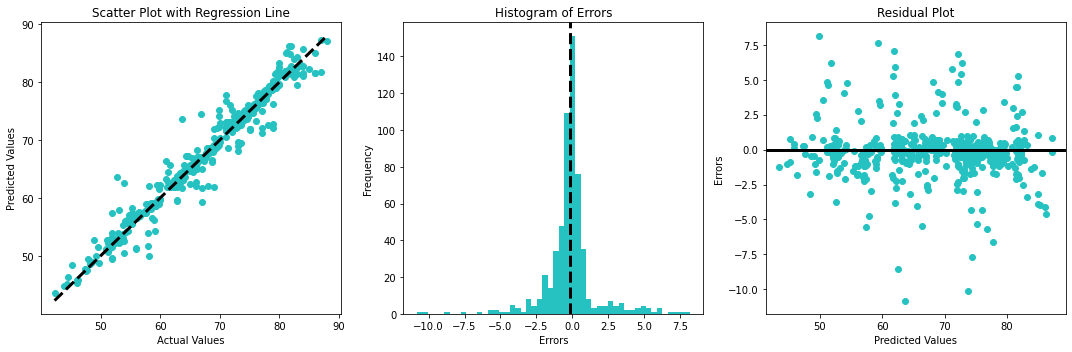

In [13]:
plot = Pipelines.RegressionPlot(y_test, y_pred.reshape(-1), color='#26c2c2')
plot.plot()

<br><br><br><br><br><br><br><br><br>

## Much tunning cam be done here, we can say that Resnet is doing better in general

## Also we can notice that extra trees is still better then what comes next is the ResNet Neural Net